In [1]:
import pandas as pd
import seaborn as sns
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [2]:
import os
print(os.listdir(r"C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3"))

['creditcard.csv']


In the above 2 cells I'm simply important the data using kagglehub

In [3]:
df = pd.read_csv(r"C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Class'>

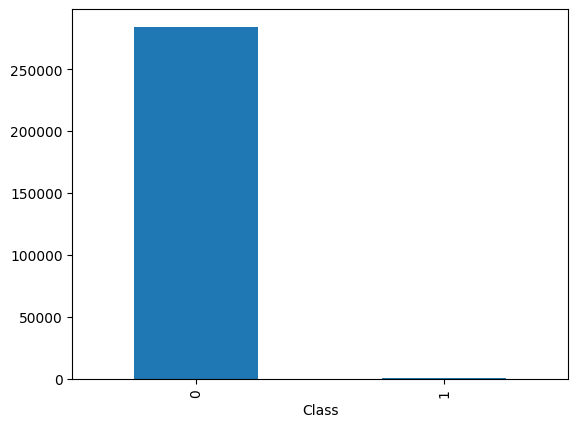

In [4]:
fraud_counts = df["Class"].value_counts()
fraud_counts.plot(kind = 'bar')


In [5]:
df.isna().any().any()

False

The below codecell splits the data up and prints out the shape which will be important as mistakes in training data are severe so having something to look back to

In [6]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Class"])  
t = df["Class"] 
X_train, X_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0, stratify = t)
print(X_train.shape)
print(X_test.shape)
print(t_train.shape)
print(t_test.shape)


(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [7]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0, max_iter= 100000)


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
logisticReg.fit(X_train, t_train)
train_score = logisticReg.score(X_train, t_train)

test_score = logisticReg.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9992143781957032
Test Score: 0.9992099996488887


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.63      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



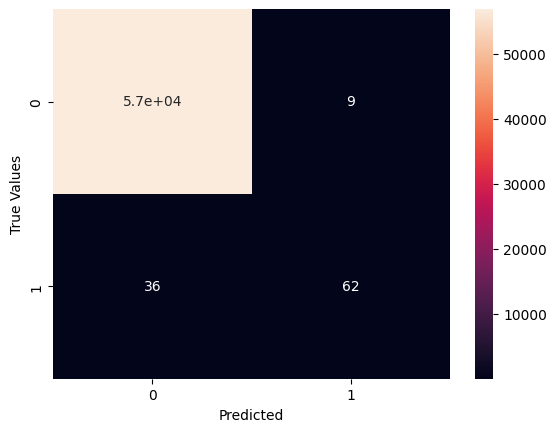

In [9]:
import matplotlib.pyplot as plt

y_pred = logisticReg.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [10]:
import xgboost as xgb
extremeGradientBoost = xgb.XGBClassifier()
extremeGradientBoost.fit(X_train, t_train)
train_score = extremeGradientBoost.score(X_train, t_train)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 1.0
Test Score: 0.999403110845827


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



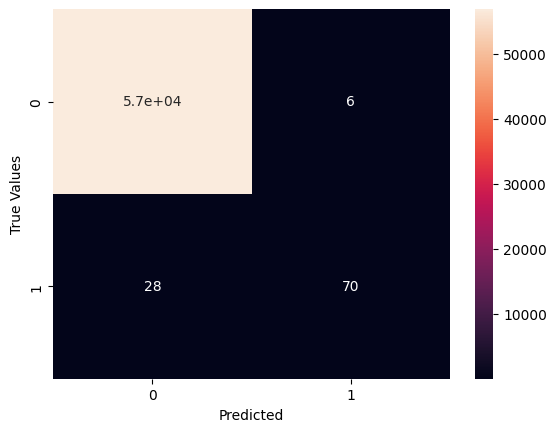

In [11]:
import matplotlib.pyplot as plt

y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [12]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train, t_train)
train_score = svm.score(X_train, t_train)

test_score = svm.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9982707542408216
Test Score: 0.9982795547909132


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

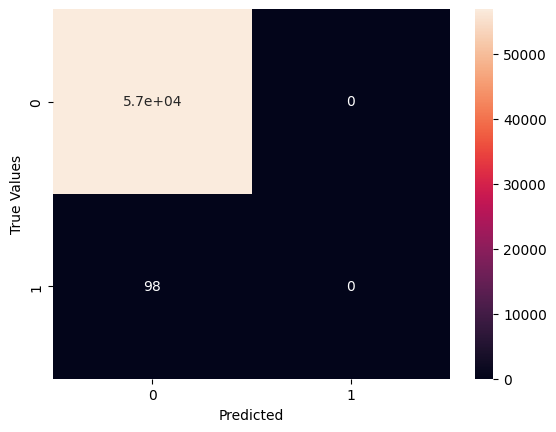

In [13]:
y_pred = svm.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, t_train)
train_score = rf.score(X_train, t_train)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 1.0
Test Score: 0.9994557775359011


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



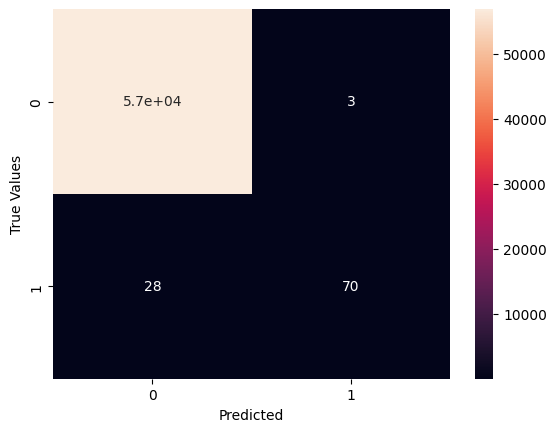

In [15]:
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, t_train)
train_score = mlp.score(X_train, t_train)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9983321995216046
Test Score: 0.9983673326077034


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.45      0.49        98

    accuracy                           1.00     56962
   macro avg       0.76      0.72      0.74     56962
weighted avg       1.00      1.00      1.00     56962



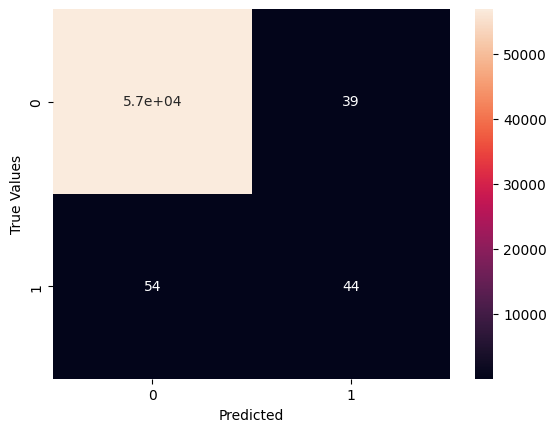

In [17]:
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 0.5, random_state= 0)
X_trainSmote, T_trainSmote = smote.fit_resample(X_train, t_train)

logWithSmote = LogisticRegression(max_iter=100000, random_state= 0)
logWithSmote.fit(X_trainSmote, T_trainSmote)

train_score = logWithSmote.score(X_trainSmote, T_trainSmote)  
test_score = logWithSmote.score(X_test, t_test) 

print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9839701503036556
Test Score: 0.9941188862750606


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.87      0.34        98

    accuracy                           0.99     56962
   macro avg       0.60      0.93      0.67     56962
weighted avg       1.00      0.99      1.00     56962



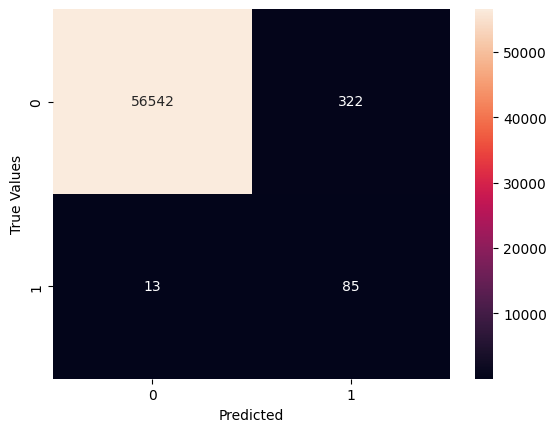

In [19]:
import matplotlib.pyplot as plt
y_pred_smote = logWithSmote.predict(X_test)
print(classification_report(t_test, y_pred_smote))
cm = confusion_matrix(t_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



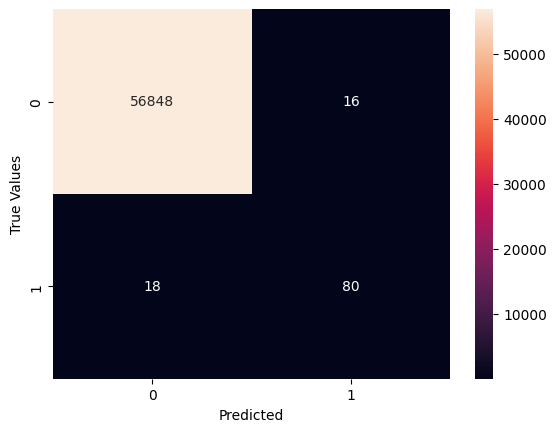

In [20]:
import xgboost as xgb
extremeGradientBoost = xgb.XGBClassifier()
extremeGradientBoost.fit(X_trainSmote, T_trainSmote)
train_score = extremeGradientBoost.score(X_trainSmote, T_trainSmote)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
import matplotlib.pyplot as plt

y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



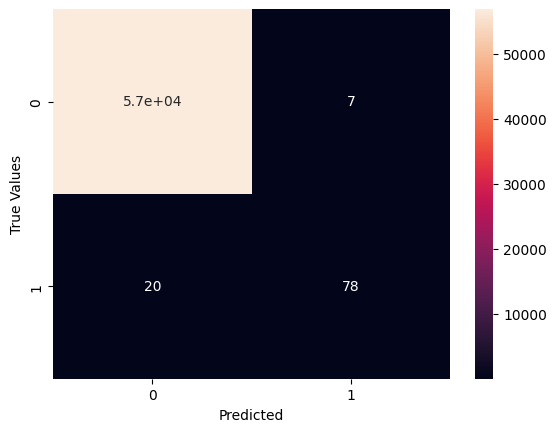

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_trainSmote, T_trainSmote)
train_score = rf.score(X_trainSmote, T_trainSmote)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9804118695336131
Test Score: 0.9972437765527896
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.82      0.50        98

    accuracy                           1.00     56962
   macro avg       0.68      0.91      0.75     56962
weighted avg       1.00      1.00      1.00     56962



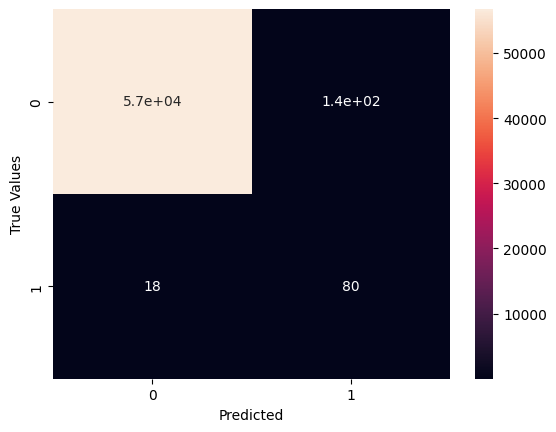

In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_trainSmote, T_trainSmote)
train_score = mlp.score(X_trainSmote, T_trainSmote)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
import xgboost as xgb
extremeGradientBoost = xgb.XGBClassifier(random_state = 0)
kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 0) #consistency on runs
hyper_parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [300, 500],  
    'max_depth': [3, 5, 6, 8, 10, 14],
    'min_child_weight': [1],
    'subsample': [0.5, 0.7]
}
gridSearch = GridSearchCV(extremeGradientBoost, hyper_parameters, cv = kf, scoring = 'recall')
gridSearch.fit(X_trainSmote, T_trainSmote)
print("Best params : ", gridSearch.best_params_)

Best params :  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.5}


Train Score: 1.0
Test Score: 0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



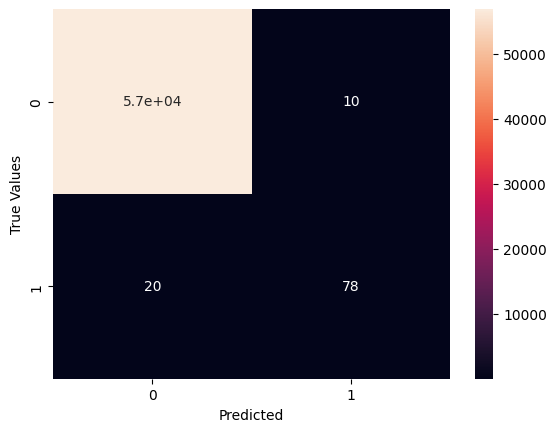

In [24]:
import xgboost as xgb
import matplotlib.pyplot as plt

extremeGradientBoost = xgb.XGBClassifier(**gridSearch.best_params_, random_state = 0)
extremeGradientBoost.fit(X_trainSmote, T_trainSmote)
train_score = extremeGradientBoost.score(X_trainSmote, T_trainSmote)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9842104954627524
Test Score: 0.9903093290263685
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.88      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.93      0.62     56962
weighted avg       1.00      0.99      0.99     56962



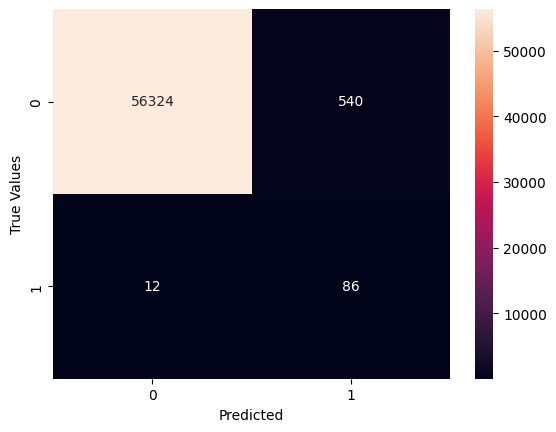

In [25]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logisticReg = LogisticRegression(random_state=0, max_iter= 20000, C = 0.1, class_weight = 'balanced')
logisticReg.fit(X_trainSmote, T_trainSmote)
train_score = logisticReg.score(X_trainSmote, T_trainSmote)

test_score = logisticReg.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = logisticReg.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



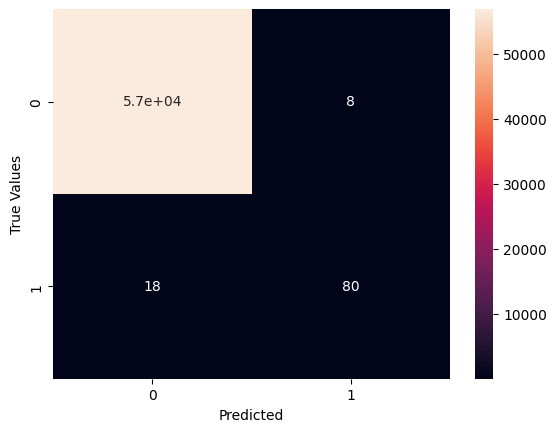

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators= 100, max_depth = None, min_samples_split=3)
rf.fit(X_trainSmote, T_trainSmote)
train_score = rf.score(X_trainSmote, T_trainSmote)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9814582502872418
Test Score: 0.9845335486815772
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.87      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.58     56962
weighted avg       1.00      0.98      0.99     56962



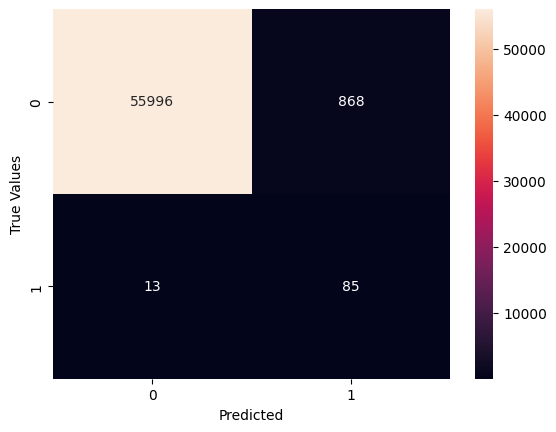

In [27]:
mlp = MLPClassifier(random_state=0, activation = 'relu', hidden_layer_sizes= (100, 100), solver = 'adam')
mlp.fit(X_trainSmote, T_trainSmote)
train_score = mlp.score(X_trainSmote, T_trainSmote)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [28]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy=0.5, random_state=0)
X_train_adasyn, t_train_adasyn = adasyn.fit_resample(X_train, t_train)

Train Score: 0.982875236378029
Test Score: 0.9935219971208876
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.87      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.93      0.66     56962
weighted avg       1.00      0.99      1.00     56962



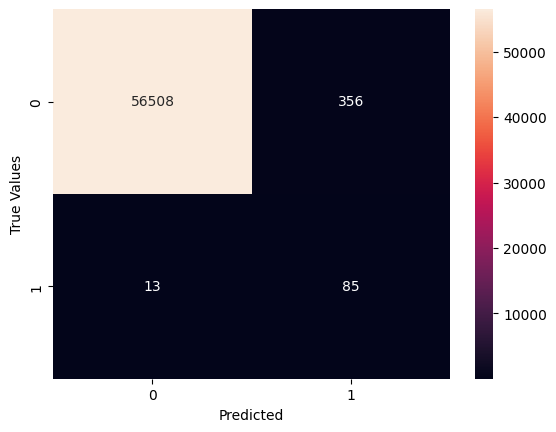

In [29]:
logWithADA = LogisticRegression(max_iter=100000, random_state= 0)
logWithADA.fit(X_train_adasyn, t_train_adasyn)

train_score = logWithADA.score(X_train_adasyn, t_train_adasyn)  
test_score = logWithADA.score(X_test, t_test) 

print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
import matplotlib.pyplot as plt
y_pred_ADA = logWithADA.predict(X_test)
print(classification_report(t_test, y_pred_ADA))
cm = confusion_matrix(t_test, y_pred_ADA)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9833619185833443
Test Score: 0.9897651065622696
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.88      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.93      0.61     56962
weighted avg       1.00      0.99      0.99     56962



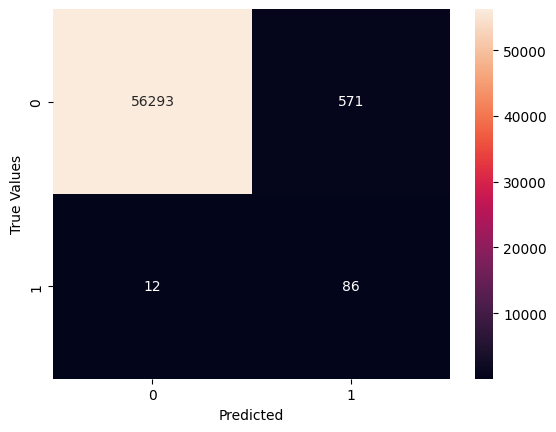

In [30]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logisticReg = LogisticRegression(random_state=0, max_iter= 20000, C = 1, class_weight = 'balanced')
logisticReg.fit(X_train_adasyn, t_train_adasyn)
train_score = logisticReg.score(X_train_adasyn, t_train_adasyn)

test_score = logisticReg.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = logisticReg.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



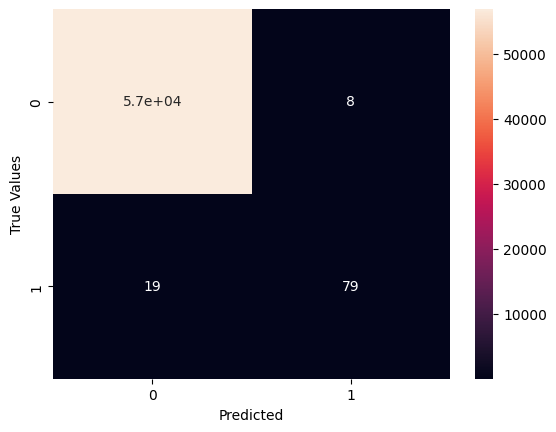

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators= 100, max_depth = None, min_samples_split=3)
rf.fit(X_train_adasyn, t_train_adasyn)
train_score = rf.score(X_train_adasyn, t_train_adasyn)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



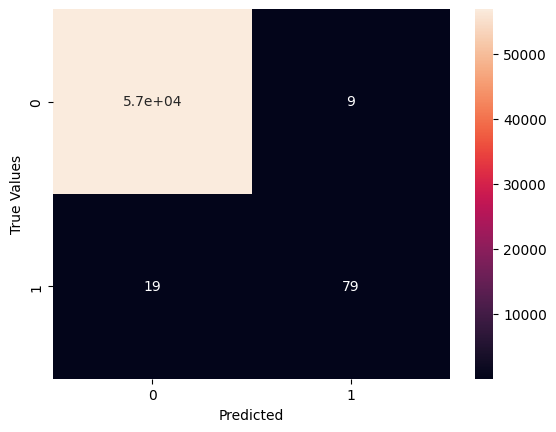

In [32]:

extremeGradientBoost = xgb.XGBClassifier(**gridSearch.best_params_, random_state = 0)
extremeGradientBoost.fit(X_train_adasyn, t_train_adasyn)
train_score = extremeGradientBoost.score(X_train_adasyn, t_train_adasyn)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9825439406599528
Test Score: 0.9907131069836032
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.85      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.62     56962
weighted avg       1.00      0.99      0.99     56962



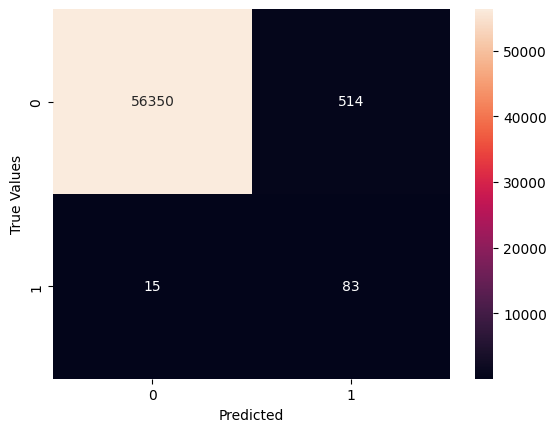

In [33]:
mlp = MLPClassifier(random_state=0, activation = 'relu', hidden_layer_sizes= (100, 100), solver = 'adam')
mlp.fit(X_train_adasyn, t_train_adasyn)
train_score = mlp.score(X_train_adasyn, t_train_adasyn)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



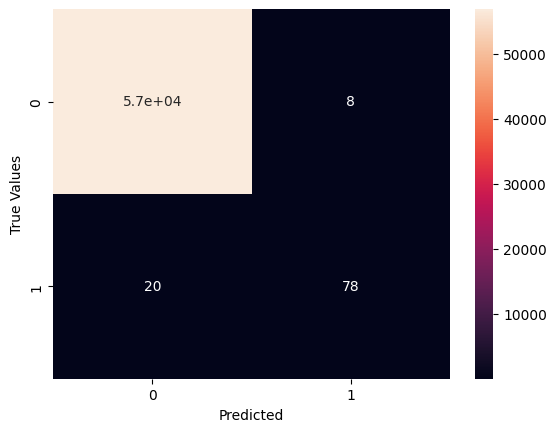

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train_adasyn, t_train_adasyn)
train_score = rf.score(X_train_adasyn, t_train_adasyn)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



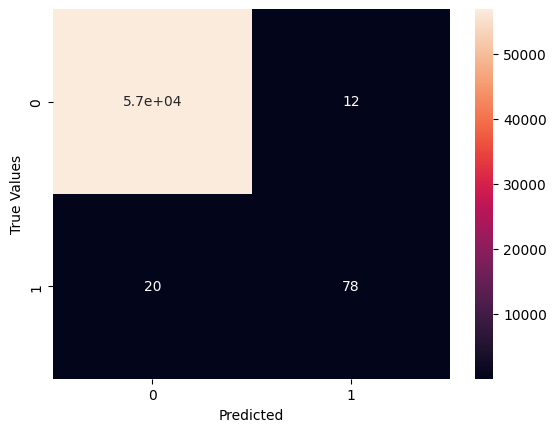

In [35]:
extremeGradientBoost = xgb.XGBClassifier(random_state = 0)
extremeGradientBoost.fit(X_train_adasyn, t_train_adasyn)
train_score = extremeGradientBoost.score(X_train_adasyn, t_train_adasyn)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9846607150710234
Test Score: 0.9940662195849865
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.20      0.83      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.91      0.66     56962
weighted avg       1.00      0.99      1.00     56962



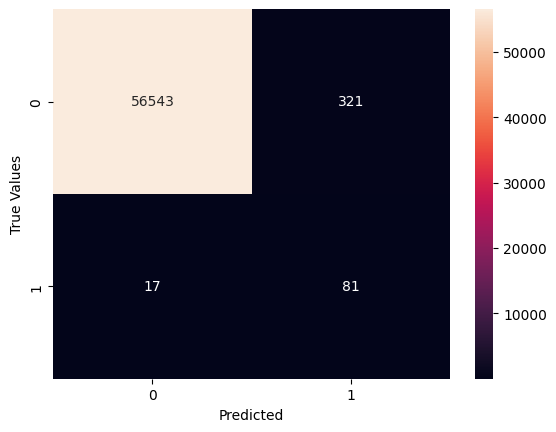

In [36]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_adasyn, t_train_adasyn)
train_score = mlp.score(X_train_adasyn, t_train_adasyn)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [38]:
from imblearn.over_sampling import BorderlineSMOTE
borderlineSmote = BorderlineSMOTE(random_state=0)
X_train_borderline, t_train_borderline = borderlineSmote.fit_resample(X_train, t_train)

Train Score: 0.9979665950028798
Test Score: 0.9975773322565921
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.81      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.77     56962
weighted avg       1.00      1.00      1.00     56962



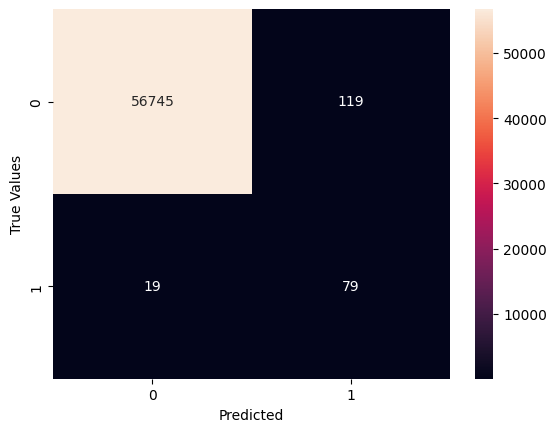

In [39]:
logWithbl = LogisticRegression(max_iter=100000, random_state= 0)
logWithbl.fit(X_train_borderline, t_train_borderline)

train_score = logWithbl.score(X_train_borderline, t_train_borderline)  
test_score = logWithbl.score(X_test, t_test) 

print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
import matplotlib.pyplot as plt
y_pred = logWithbl.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9979665950028798
Test Score: 0.9975773322565921
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.81      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.77     56962
weighted avg       1.00      1.00      1.00     56962



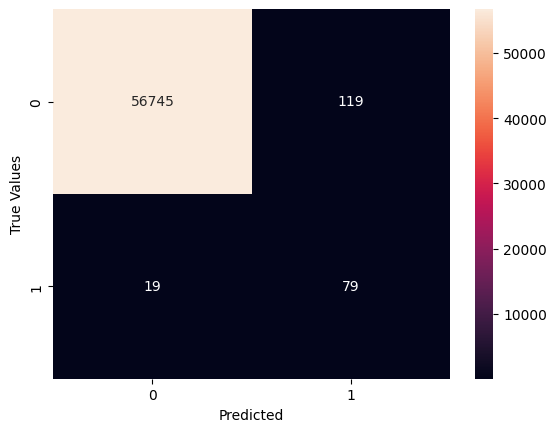

In [40]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logisticReg = LogisticRegression(random_state=0, max_iter= 20000, C = 1, class_weight = 'balanced')
logisticReg.fit(X_train_borderline, t_train_borderline)
train_score = logisticReg.score(X_train_borderline, t_train_borderline)

test_score = logisticReg.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = logisticReg.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9970916812851999
Test Score: 0.9952951090200485
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.83      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.91      0.69     56962
weighted avg       1.00      1.00      1.00     56962



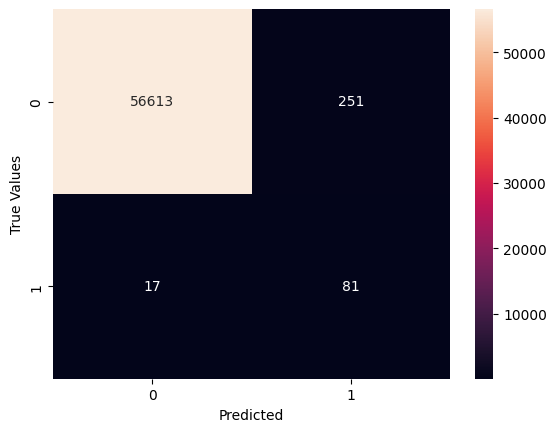

In [41]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_borderline, t_train_borderline)
train_score = mlp.score(X_train_borderline, t_train_borderline)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9961793968810865
Test Score: 0.9969102208489871
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.80      0.47        98

    accuracy                           1.00     56962
   macro avg       0.67      0.90      0.73     56962
weighted avg       1.00      1.00      1.00     56962



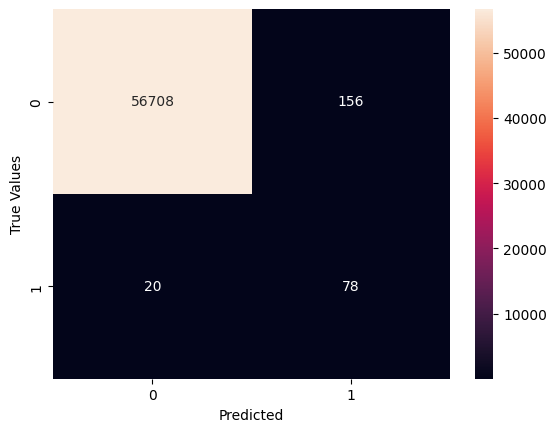

In [42]:
mlp = MLPClassifier(random_state=0, activation = 'relu', hidden_layer_sizes= (100, 100), solver = 'adam')
mlp.fit(X_train_borderline, t_train_borderline)
train_score = mlp.score(X_train_borderline, t_train_borderline)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



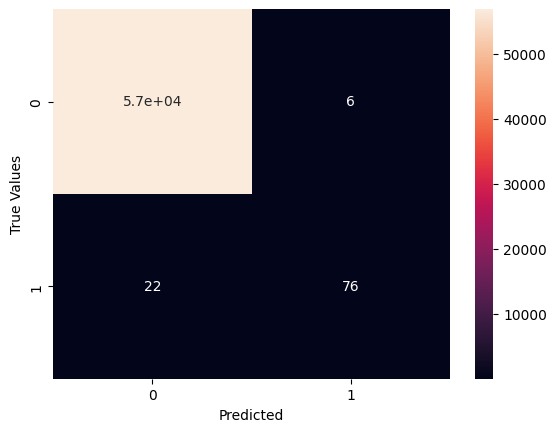

In [43]:
extremeGradientBoost = xgb.XGBClassifier(random_state = 0)
extremeGradientBoost.fit(X_train_borderline, t_train_borderline)
train_score = extremeGradientBoost.score(X_train_borderline, t_train_borderline)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.79      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



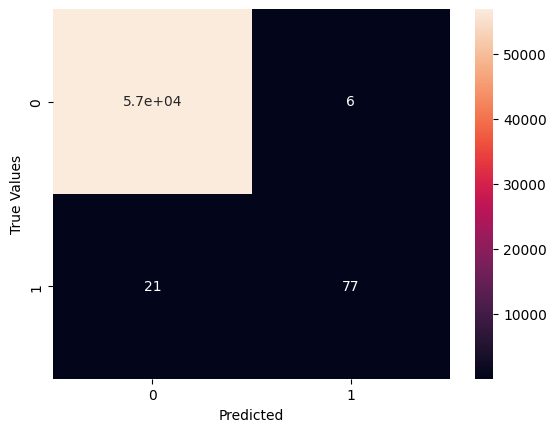

In [44]:
extremeGradientBoost = xgb.XGBClassifier(**gridSearch.best_params_, random_state = 0)
extremeGradientBoost.fit(X_train_borderline, t_train_borderline)
train_score = extremeGradientBoost.score(X_train_borderline, t_train_borderline)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



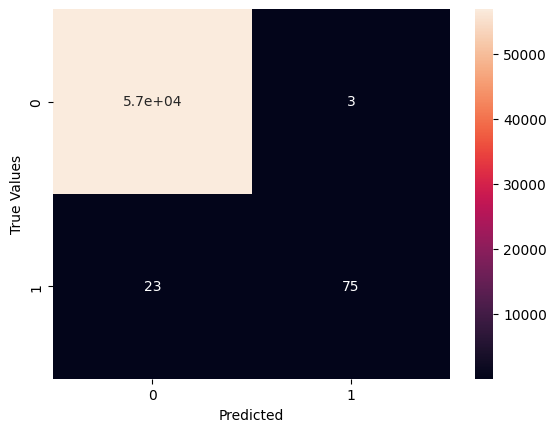

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators= 100, max_depth = None, min_samples_split=3)
rf.fit(X_train_borderline, t_train_borderline)
train_score = rf.score(X_train_borderline, t_train_borderline)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



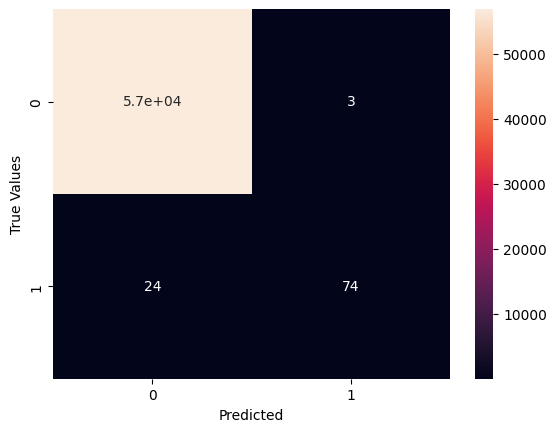

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train_borderline, t_train_borderline)
train_score = rf.score(X_train_borderline, t_train_borderline)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()